https://dgschwend.github.io/netscope/quickstart.html

In [1]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

In [19]:
import cv2 as cv

In [3]:
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [ ]:
path='dogs-vs-cats/'

In [5]:
os.listdir("dogs-vs-cats/train/")

['cat.0.jpg',
 'cat.1.jpg',
 'cat.10.jpg',
 'cat.100.jpg',
 'cat.1000.jpg',
 'cat.10000.jpg',
 'cat.10001.jpg',
 'cat.10002.jpg',
 'cat.10003.jpg',
 'cat.10004.jpg',
 'cat.10005.jpg',
 'cat.10006.jpg',
 'cat.10007.jpg',
 'cat.10008.jpg',
 'cat.10009.jpg',
 'cat.1001.jpg',
 'cat.10010.jpg',
 'cat.10011.jpg',
 'cat.10012.jpg',
 'cat.10013.jpg',
 'cat.10014.jpg',
 'cat.10015.jpg',
 'cat.10016.jpg',
 'cat.10017.jpg',
 'cat.10018.jpg',
 'cat.10019.jpg',
 'cat.1002.jpg',
 'cat.10020.jpg',
 'cat.10021.jpg',
 'cat.10022.jpg',
 'cat.10023.jpg',
 'cat.10024.jpg',
 'cat.10025.jpg',
 'cat.10026.jpg',
 'cat.10027.jpg',
 'cat.10028.jpg',
 'cat.10029.jpg',
 'cat.1003.jpg',
 'cat.10030.jpg',
 'cat.10031.jpg',
 'cat.10032.jpg',
 'cat.10033.jpg',
 'cat.10034.jpg',
 'cat.10035.jpg',
 'cat.10036.jpg',
 'cat.10037.jpg',
 'cat.10038.jpg',
 'cat.10039.jpg',
 'cat.1004.jpg',
 'cat.10040.jpg',
 'cat.10041.jpg',
 'cat.10042.jpg',
 'cat.10043.jpg',
 'cat.10044.jpg',
 'cat.10045.jpg',
 'cat.10046.jpg',
 'cat.1004

In [6]:
filenames=os.listdir("dogs-vs-cats/train/")

In [8]:
filenames[len(filenames)-10:]

['dog.9990.jpg',
 'dog.9991.jpg',
 'dog.9992.jpg',
 'dog.9993.jpg',
 'dog.9994.jpg',
 'dog.9995.jpg',
 'dog.9996.jpg',
 'dog.9997.jpg',
 'dog.9998.jpg',
 'dog.9999.jpg']

In [10]:
filenames[0].split(".")[0]

'cat'

In [13]:
categories=[]
for filename in filenames:
    category=filename.split(".")[0]
    if category=="dog":
        categories.append(1)
    else:
        categories.append(0)

In [15]:
df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [16]:
df

,filename,category
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0
3,cat.100.jpg,0
4,cat.1000.jpg,0
...,...,...
24995,dog.9995.jpg,1
24996,dog.9996.jpg,1
24997,dog.9997.jpg,1
24998,dog.9998.jpg,1


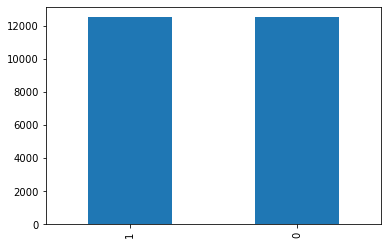

In [18]:
df['category'].value_counts().plot.bar()

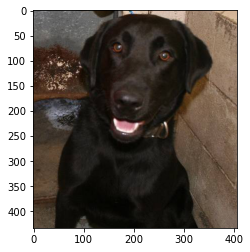

In [105]:
sample=random.choice(filenames)
image=load_img("dogs-vs-cats/train/"+sample)
plt.imshow(image)

In [285]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_9 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_10 (Batc (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 64)      

In [286]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# ReduceLROnPlateau = earlystopping중 하나.
# 학습이 고지에 다다르고 성능에 개선이 없으면, learning rate를 조금씩 줄여가겠다
earlystop= EarlyStopping(patience=10)

In [287]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
#내가 모니터링 하고자 하는것은 정확도(accuracy)
#정확도가 잘 안되도 2번씩 참는다
#2번참아도 안되면 facor적용 -> learning rate(lr) / 2 
#이런식으로 반복된다 최소 lr이 될때까지

In [288]:
callbacks = [earlystop, learning_rate_reduction]

In [289]:
df

,filename,category
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0
3,cat.100.jpg,0
4,cat.1000.jpg,0
...,...,...
24995,dog.9995.jpg,1
24996,dog.9996.jpg,1
24997,dog.9997.jpg,1
24998,dog.9998.jpg,1


In [290]:
df['category']=df['category'].replace({0:'cat', 1:'dog'})

In [291]:
df

,filename,category
0,cat.0.jpg,cat
1,cat.1.jpg,cat
2,cat.10.jpg,cat
3,cat.100.jpg,cat
4,cat.1000.jpg,cat
...,...,...
24995,dog.9995.jpg,dog
24996,dog.9996.jpg,dog
24997,dog.9997.jpg,dog
24998,dog.9998.jpg,dog


In [292]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

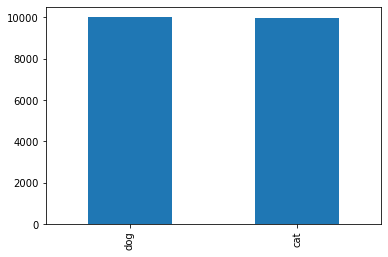

In [294]:
train_df['category'].value_counts().plot.bar()

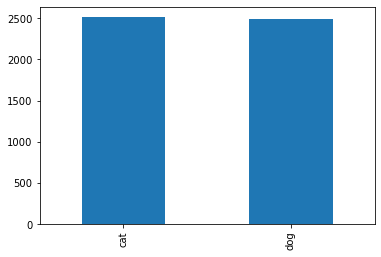

In [295]:
validate_df['category'].value_counts().plot.bar()

In [296]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

In [298]:
total_train, total_validate

(20000, 5000)

In [299]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

flow from dataframe  
파일 이름과 카테고리에 있는 정보를 토대로 데이터 프레임이 실제로 저장되어있는 디렉토리를 넣어줘야함

In [306]:
# flow, flow from directory, flow from dataframe 3가지 종류
train_datagen.flow_from_dataframe(
                                    train_df,
                                    "C:/Users/i/Desktop/dogs-vs-cats/train/",
                                    x_col="filename",
                                    y_col="category",
                                    target_size=IMAGE_SIZE,
                                    class_mode='categorical',
                                    batch_size=batch_size
)

Found 20000 validated image filenames belonging to 2 classes.


In [304]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "C:/Users/i/Desktop/dogs-vs-cats/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 5000 validated image filenames belonging to 2 classes.


In [307]:
example_df=train_df.sample(1).reset_index(drop=True)

In [308]:
example_generator=train_datagen.flow_from_dataframe(
example_df,
    "C:/Users/i/Desktop/dogs-vs-cats/train/",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',

)

Found 1 validated image filenames belonging to 1 classes.


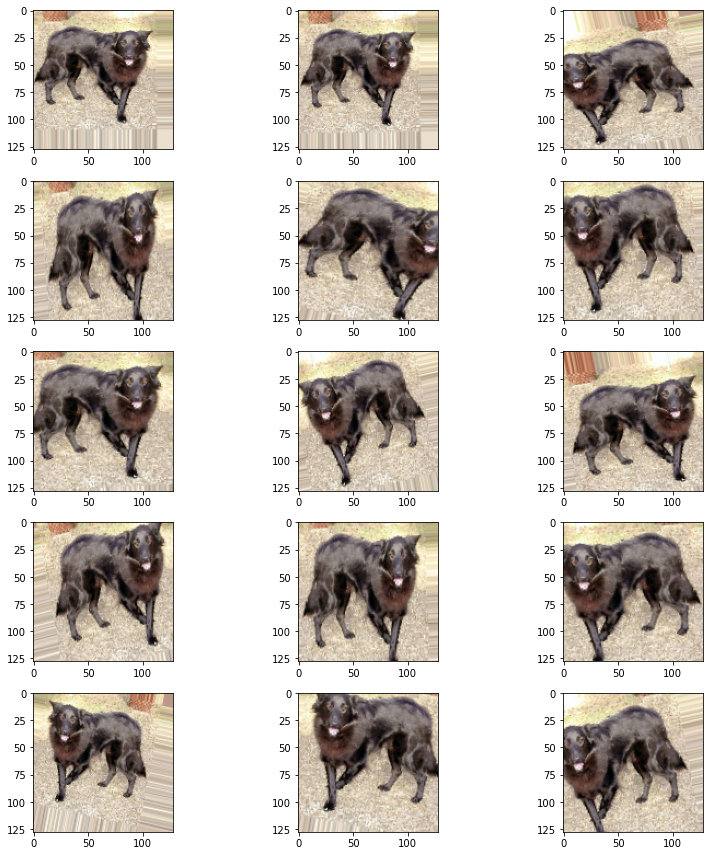

In [309]:
# 증식된 15개의 이미지
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()


In [ ]:
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)
# model.save_weights("model.h5")

In [310]:
from keras.models import load_model

In [323]:
# model=load_model("C:/Users/i/Desktop/model.h5")
model.load_weights("C:/Users/i/Desktop/model.h5")

### 예측/분류

In [324]:
test_filenames = os.listdir("C:/Users/i/Desktop/dogs-vs-cats/test1/")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]


In [325]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "C:/Users/i/Desktop/dogs-vs-cats/test1/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)
#이거가지고 예측(prediction)

Found 12500 validated image filenames.


In [326]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

test_df['category'] = np.argmax(predict, axis=-1) #최대값 가장 확률높은값을 출력

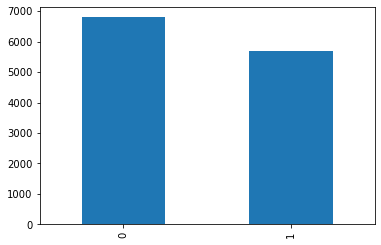

In [327]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)
test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })

test_df['category'].value_counts().plot.bar()

---

##### overfitting 줄이는법
- dropout 과적합 방지 : 학습을 시키는데에 있어서 랜덤하게 특정 노드를 끊어버린다.
    - 마치 여러개의 노드를 결합하는듯한 모델을 만듦
    - fully connected 노드 보다 dropout한것이 훨씬 잘 만들어 진다.
    - 천재 한명보다 여러명이 더 유리하다.
- data augmentation
- 일반화(regularization): 지나치게 학습데이터에 집중하는 것을 피하기 위한 것 L1/L2 (선생님 ppt뒷쪽 참고)


# 연습

In [107]:
from keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# 보스턴이라는 도시에 주택에대한 가격정보가 저장되어 있는 데이터셋
# 13개의 피처가 있다.
# 특정 위치의 중앙값을 예측하는 문제
# 다층 신경망을 이용해서 이것과 관련된 문제를 해결가능

(404, 13) (102, 13) (404,) (102,)


In [112]:
from keras.models import Sequential
model = Sequential()


In [113]:
#add 함수를 이용해서 은닉층을 추가
#방법1
from keras.layers import Activation, Dense
model.add(Dense(10, input_shape = (13,)))  #입력
model.add(Activation('sigmoid'))
model.add(Dense(10))                       #히든1            
model.add(Activation('sigmoid'))
model.add(Dense(10))                       #히든2                        
model.add(Activation('sigmoid'))
model.add(Dense(1))                        #출력     
#Sigmoid 보다는  relu가 좋은데 여기서는 층이 적어서 sigmoid사용해봄

In [ ]:
#방법2
model.add(Dense(10, input_shape = (13,), activation = 'sigmoid'))
model.add(Dense(10, activation = 'sigmoid'))
model.add(Dense(10, activation = 'sigmoid'))
model.add(Dense(1))

In [114]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                140       
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                110       
_________________________________________________________________
activation_7 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                110       
_________________________________________________________________
activation_8 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [115]:
# w: w - alpha(lr) * (cost함수를 w에대해 편미분)
from keras import optimizers
sgd = optimizers.SGD(lr = 0.01)   #lr: learning rate 
model.compile(optimizer = sgd, loss = 'mean_squared_error', metrics = ['mse'])  

[일반화,학습률](https://m.blog.naver.com/PostView.nhn?blogId=sohyunst&logNo=221587342856&proxyReferer=https:%2F%2Fwww.google.com%2F)

In [120]:
model.fit(X_train, y_train, batch_size = 50, epochs = 100, verbose = 1)
# batch_size : 한 번에 몇개의 데이터를 학습할것인가?
# verbose : 학습과정 출력 여부?

Epoch 1/100
9/9 [==============================] - 0s 778us/step - loss: 85.0397 - mse: 85.0397
Epoch 2/100
9/9 [==============================] - 0s 667us/step - loss: 84.8848 - mse: 84.8848
Epoch 3/100
9/9 [==============================] - 0s 667us/step - loss: 84.8974 - mse: 84.8974
Epoch 4/100
9/9 [==============================] - 0s 778us/step - loss: 85.3512 - mse: 85.3512
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 85.0360 - mse: 85.0360
Epoch 6/100
9/9 [==============================] - 0s 999us/step - loss: 84.9323 - mse: 84.9323
Epoch 7/100
9/9 [==============================] - 0s 889us/step - loss: 84.8853 - mse: 84.8853
Epoch 8/100
9/9 [==============================] - 0s 778us/step - loss: 86.0147 - mse: 86.0147
Epoch 9/100
9/9 [==============================] - 0s 778us/step - loss: 85.0757 - mse: 85.0757
Epoch 10/100
9/9 [==============================] - 0s 778us/step - loss: 84.9915 - mse: 84.9915
Epoch 11/100
9/9 [=======================

9/9 [==============================] - 0s 778us/step - loss: 84.9804 - mse: 84.9804
Epoch 86/100
9/9 [==============================] - 0s 778us/step - loss: 84.9407 - mse: 84.9407
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 84.8407 - mse: 84.8407
Epoch 88/100
9/9 [==============================] - 0s 1000us/step - loss: 84.9020 - mse: 84.9020
Epoch 89/100
9/9 [==============================] - 0s 778us/step - loss: 84.9687 - mse: 84.9687
Epoch 90/100
9/9 [==============================] - 0s 778us/step - loss: 85.2735 - mse: 85.2735
Epoch 91/100
9/9 [==============================] - 0s 778us/step - loss: 84.8895 - mse: 84.8895
Epoch 92/100
9/9 [==============================] - 0s 667us/step - loss: 85.0973 - mse: 85.0973
Epoch 93/100
9/9 [==============================] - 0s 1ms/step - loss: 84.6718 - mse: 84.6718
Epoch 94/100
9/9 [==============================] - 0s 555us/step - loss: 84.7461 - mse: 84.7461
Epoch 95/100
9/9 [============================

In [117]:
#모델 평가 : evaluate함수 -> 퍼러미터: 학습데이터와, 학습 레이블
results = model.evaluate(X_test, y_test)

print(model.metrics_names)     
print(results)                

print('loss: ', results[0])
print('mse: ', results[1])


4/4 [==============================] - 0s 750us/step - loss: 85.4669 - mse: 85.4669
['loss', 'mse']
[85.46686553955078, 85.46686553955078]
loss:  85.46686553955078
mse:  85.46686553955078


# 분류 관련 코드 (연습)

In [119]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

whole_data = load_breast_cancer()
whole_data.keys() #7개의 컬럼 확인 (피처)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [121]:
X_data = whole_data.data
y_data = whole_data.target
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 7) 

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(398, 30) (171, 30) (398,) (171,)


In [122]:
from keras.models import Sequential
model = Sequential()  
#맨마지막에는 반드시 sigmoid로 끝나야한다. 0또는1 로 나와야 하니까.
# relu사용하는 이유 : 기울기 손실문제를 해결하기 위해 (역전파에서)

In [123]:
from keras.layers import Activation, Dense
model.add(Dense(10, input_shape = (30,)))   
model.add(Activation('sigmoid'))
model.add(Dense(10))                        
model.add(Dense(10))                      
model.add(Activation('sigmoid'))
model.add(Dense(1))                          
model.add(Activation('sigmoid'))     
model.add(Dense(10, input_shape = (30,), activation = 'sigmoid'))
model.add(Dense(10, activation = 'sigmoid'))
model.add(Dense(10, activation = 'sigmoid'))
model.add(Dense(1, activation = 'sigmoid'))


In [124]:
from keras import optimizers
sgd = optimizers.SGD(lr = 0.01)    # stochastic gradient descent optimizer
model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics = ['acc'])  


In [125]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 10)                310       
_________________________________________________________________
activation_9 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_14 (Dense)             (None, 10)                110       
_________________________________________________________________
activation_10 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 11        
_________________________________________________________________
activation_11 (Activation)   (None, 1)                

In [126]:
model.fit(X_train, y_train, batch_size = 50, epochs = 100, verbose = 1)



Epoch 1/100
8/8 [==============================] - 0s 875us/step - loss: 0.6820 - acc: 0.6055
Epoch 2/100
8/8 [==============================] - 0s 750us/step - loss: 0.6803 - acc: 0.6055
Epoch 3/100
8/8 [==============================] - 0s 875us/step - loss: 0.6789 - acc: 0.6055
Epoch 4/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6776 - acc: 0.6055
Epoch 5/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6766 - acc: 0.6055
Epoch 6/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6757 - acc: 0.6055
Epoch 7/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6750 - acc: 0.6055
Epoch 8/100
8/8 [==============================] - 0s 874us/step - loss: 0.6743 - acc: 0.6055
Epoch 9/100
8/8 [==============================] - 0s 1000us/step - loss: 0.6738 - acc: 0.6055
Epoch 10/100
8/8 [==============================] - 0s 875us/step - loss: 0.6733 - acc: 0.6055
Epoch 11/100
8/8 [==============================] - 0s 1000us/step

8/8 [==============================] - 0s 874us/step - loss: 0.6708 - acc: 0.6055
Epoch 89/100
8/8 [==============================] - 0s 750us/step - loss: 0.6707 - acc: 0.6055
Epoch 90/100
8/8 [==============================] - 0s 875us/step - loss: 0.6708 - acc: 0.6055
Epoch 91/100
8/8 [==============================] - 0s 875us/step - loss: 0.6708 - acc: 0.6055
Epoch 92/100
8/8 [==============================] - 0s 750us/step - loss: 0.6707 - acc: 0.6055
Epoch 93/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6708 - acc: 0.6055
Epoch 94/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6708 - acc: 0.6055
Epoch 95/100
8/8 [==============================] - 0s 875us/step - loss: 0.6708 - acc: 0.6055
Epoch 96/100
8/8 [==============================] - 0s 750us/step - loss: 0.6708 - acc: 0.6055
Epoch 97/100
8/8 [==============================] - 0s 875us/step - loss: 0.6707 - acc: 0.6055
Epoch 98/100
8/8 [==============================] - 0s 2ms/step - l

In [127]:
results = model.evaluate(X_test, y_test)

print(model.metrics_names)
print(results)     


6/6 [==============================] - 0s 667us/step - loss: 0.6396 - acc: 0.6784
['loss', 'acc']
[0.6395959854125977, 0.6783625483512878]


# 분류 문제2 (여러개로 분류해야할 경우) 다중분류

In [154]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()

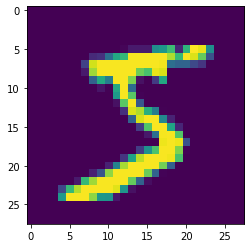

Label:  5


In [155]:
plt.imshow(X_train[0])  
plt.show()
print('Label: ', y_train[0])

##### 여러층(다층) 퍼셈트론은 1차원 벡터 형태로 데이터를 입력받음

In [156]:
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

In [157]:
X_train.shape[0]

60000

In [158]:
X_train=X_train.reshape((X_train.shape[0],-1))

In [159]:
# 1차원으로 변환
X_train.shape

(60000, 784)

In [160]:
X_test.shape[0]

10000

In [161]:
X_test=X_test.reshape((X_test.shape[0],-1))

In [162]:
X_test.shape

(10000, 784)

In [163]:
X_train, _ , y_train, _ = train_test_split(X_train, y_train, test_size = 0.67, random_state = 7) 
#test 는 무시한다는 뜻

In [164]:
X_train.shape

(19800, 784)

In [165]:
y_train[0]

6

In [166]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(19800, 784) (10000, 784) (19800, 10) (10000, 10)


In [167]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers

model = Sequential()
model.add(Dense(50, input_shape = (784, )))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

sgd = optimizers.SGD(lr = 0.001)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, batch_size = 256, validation_split = 0.3, epochs = 100, verbose = 1)

Epoch 1/100
55/55 [==============================] - 0s 6ms/step - loss: 2.5969 - accuracy: 0.1014 - val_loss: 2.5794 - val_accuracy: 0.0929
Epoch 2/100
55/55 [==============================] - 0s 3ms/step - loss: 2.5537 - accuracy: 0.1014 - val_loss: 2.5408 - val_accuracy: 0.0929
Epoch 3/100
55/55 [==============================] - 0s 3ms/step - loss: 2.5195 - accuracy: 0.1014 - val_loss: 2.5095 - val_accuracy: 0.0929
Epoch 4/100
55/55 [==============================] - 0s 3ms/step - loss: 2.4916 - accuracy: 0.1014 - val_loss: 2.4838 - val_accuracy: 0.0929
Epoch 5/100
55/55 [==============================] - 0s 3ms/step - loss: 2.4684 - accuracy: 0.1014 - val_loss: 2.4626 - val_accuracy: 0.0929
Epoch 6/100
55/55 [==============================] - ETA: 0s - loss: 2.4491 - accuracy: 0.10 - 0s 3ms/step - loss: 2.4491 - accuracy: 0.1014 - val_loss: 2.4444 - val_accuracy: 0.0929
Epoch 7/100
55/55 [==============================] - 0s 3ms/step - loss: 2.4325 - accuracy: 0.1014 - val_loss: 2

55/55 [==============================] - 0s 3ms/step - loss: 2.2985 - accuracy: 0.1143 - val_loss: 2.2999 - val_accuracy: 0.1118
Epoch 59/100
55/55 [==============================] - 0s 3ms/step - loss: 2.2984 - accuracy: 0.1143 - val_loss: 2.2999 - val_accuracy: 0.1118
Epoch 60/100
55/55 [==============================] - 0s 3ms/step - loss: 2.2984 - accuracy: 0.1143 - val_loss: 2.2998 - val_accuracy: 0.1118
Epoch 61/100
55/55 [==============================] - 0s 3ms/step - loss: 2.2983 - accuracy: 0.1143 - val_loss: 2.2998 - val_accuracy: 0.1118
Epoch 62/100
55/55 [==============================] - 0s 3ms/step - loss: 2.2983 - accuracy: 0.1143 - val_loss: 2.2998 - val_accuracy: 0.1118
Epoch 63/100
55/55 [==============================] - 0s 3ms/step - loss: 2.2983 - accuracy: 0.1143 - val_loss: 2.2997 - val_accuracy: 0.1118
Epoch 64/100
55/55 [==============================] - 0s 3ms/step - loss: 2.2982 - accuracy: 0.1143 - val_loss: 2.2997 - val_accuracy: 0.1118
Epoch 65/100
55/55 

In [168]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 50)                39250     
_________________________________________________________________
activation_17 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 50)                2550      
_________________________________________________________________
activation_18 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 50)                2550      
_________________________________________________________________
activation_19 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 50)               

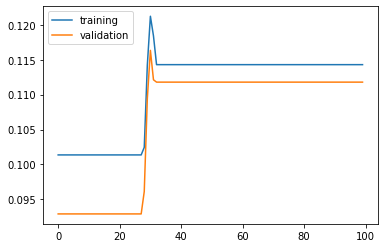

313/313 [==============================] - 0s 907us/step - loss: 2.2975 - accuracy: 0.1135
Test accuracy:  0.11349999904632568


In [170]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])


# 튜닝
- 가중치 초기화
    - 기본: 랜덤하게 가중치가 초기화됨(random_uniform)
    - random 하게 줌으로써 기울기가 손실되는 문제가 있어서 스텐퍼드대학의 르쿤교수님이 제안한것이 있음
        - 르쿤의 초기화 알고리즘
        - Xavier 초기화
        - He 초기화 (renet, 2015 창시자(마이크로소프트연구원)가 개발)

In [171]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [172]:
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

# reshaping X data: (n, 28, 28) => (n, 784)
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

X_train, _ , y_train, _ = train_test_split(X_train, y_train, test_size = 0.67, random_state = 7)


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(19800, 784) (10000, 784) (19800, 10) (10000, 10)


In [173]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model


In [175]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

313/313 [==============================] - 0s 815us/step - loss: 1.8085 - accuracy: 0.5128
Test accuracy:  0.5127999782562256


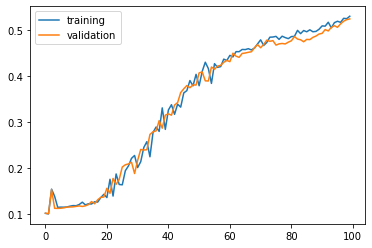

In [176]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [177]:
#relu 사용
def mlp_model2():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('relu'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('relu'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('relu'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('relu'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model


Epoch 1/100
434/434 [==============================] - 1s 2ms/step - loss: 2.9446 - accuracy: 0.4473 - val_loss: 1.5258 - val_accuracy: 0.5323
Epoch 2/100
434/434 [==============================] - 1s 1ms/step - loss: 1.3432 - accuracy: 0.5608 - val_loss: 1.3566 - val_accuracy: 0.5864
Epoch 3/100
434/434 [==============================] - 1s 1ms/step - loss: 1.1669 - accuracy: 0.6151 - val_loss: 1.1443 - val_accuracy: 0.6520
Epoch 4/100
434/434 [==============================] - 1s 1ms/step - loss: 1.0104 - accuracy: 0.6696 - val_loss: 0.9824 - val_accuracy: 0.6909
Epoch 5/100
434/434 [==============================] - 1s 1ms/step - loss: 0.8791 - accuracy: 0.7187 - val_loss: 0.9693 - val_accuracy: 0.7296
Epoch 6/100
434/434 [==============================] - 1s 1ms/step - loss: 0.7640 - accuracy: 0.7587 - val_loss: 0.8456 - val_accuracy: 0.7662
Epoch 7/100
434/434 [==============================] - 1s 1ms/step - loss: 0.6810 - accuracy: 0.7841 - val_loss: 0.7210 - val_accuracy: 0.8029

Epoch 58/100
434/434 [==============================] - 1s 1ms/step - loss: 0.1873 - accuracy: 0.9436 - val_loss: 0.4439 - val_accuracy: 0.9003
Epoch 59/100
434/434 [==============================] - 1s 1ms/step - loss: 0.1828 - accuracy: 0.9462 - val_loss: 0.4468 - val_accuracy: 0.9003
Epoch 60/100
434/434 [==============================] - 1s 1ms/step - loss: 0.1856 - accuracy: 0.9446 - val_loss: 0.4422 - val_accuracy: 0.9024
Epoch 61/100
434/434 [==============================] - 1s 1ms/step - loss: 0.1796 - accuracy: 0.9474 - val_loss: 0.4672 - val_accuracy: 0.9000
Epoch 62/100
434/434 [==============================] - 1s 1ms/step - loss: 0.1801 - accuracy: 0.9464 - val_loss: 0.4527 - val_accuracy: 0.9015
Epoch 63/100
434/434 [==============================] - 1s 1ms/step - loss: 0.1756 - accuracy: 0.9462 - val_loss: 0.4488 - val_accuracy: 0.9019
Epoch 64/100
434/434 [==============================] - 1s 1ms/step - loss: 0.1739 - accuracy: 0.9491 - val_loss: 0.4668 - val_accuracy:

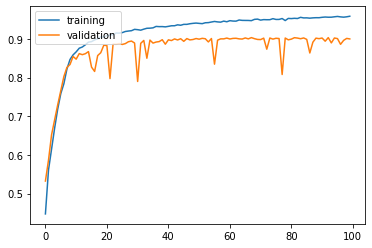

313/313 [==============================] - 0s 764us/step - loss: 0.5023 - accuracy: 0.9031
Test accuracy:  0.9031000137329102


In [178]:
model = mlp_model2()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 1)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

In [182]:
#relu 사용
def mlp_model3():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('relu'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('relu'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('relu'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('relu'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model


Epoch 1/100
434/434 [==============================] - 1s 2ms/step - loss: 5.3573 - accuracy: 0.6072 - val_loss: 1.1759 - val_accuracy: 0.7532
Epoch 2/100
434/434 [==============================] - 1s 2ms/step - loss: 0.8274 - accuracy: 0.8076 - val_loss: 0.7660 - val_accuracy: 0.8152
Epoch 3/100
434/434 [==============================] - 1s 2ms/step - loss: 0.5585 - accuracy: 0.8561 - val_loss: 0.5840 - val_accuracy: 0.8463
Epoch 4/100
434/434 [==============================] - 1s 2ms/step - loss: 0.4245 - accuracy: 0.8864 - val_loss: 0.5012 - val_accuracy: 0.8727
Epoch 5/100
434/434 [==============================] - 1s 2ms/step - loss: 0.3567 - accuracy: 0.9033 - val_loss: 0.5078 - val_accuracy: 0.8626
Epoch 6/100
434/434 [==============================] - 1s 2ms/step - loss: 0.3111 - accuracy: 0.9141 - val_loss: 0.4239 - val_accuracy: 0.8887
Epoch 7/100
434/434 [==============================] - 1s 2ms/step - loss: 0.2871 - accuracy: 0.9143 - val_loss: 0.4921 - val_accuracy: 0.8744

Epoch 58/100
434/434 [==============================] - 1s 2ms/step - loss: 0.0261 - accuracy: 0.9923 - val_loss: 0.4165 - val_accuracy: 0.9444
Epoch 59/100
434/434 [==============================] - 1s 2ms/step - loss: 0.0263 - accuracy: 0.9924 - val_loss: 0.3628 - val_accuracy: 0.9487
Epoch 60/100
434/434 [==============================] - 1s 2ms/step - loss: 0.0271 - accuracy: 0.9921 - val_loss: 0.3904 - val_accuracy: 0.9461
Epoch 61/100
434/434 [==============================] - 1s 2ms/step - loss: 0.0456 - accuracy: 0.9880 - val_loss: 0.4441 - val_accuracy: 0.9404
Epoch 62/100
434/434 [==============================] - 1s 2ms/step - loss: 0.0307 - accuracy: 0.9913 - val_loss: 0.3455 - val_accuracy: 0.9483
Epoch 63/100
434/434 [==============================] - 1s 2ms/step - loss: 0.0218 - accuracy: 0.9934 - val_loss: 0.4014 - val_accuracy: 0.9449
Epoch 64/100
434/434 [==============================] - 1s 2ms/step - loss: 0.0358 - accuracy: 0.9908 - val_loss: 0.3754 - val_accuracy:

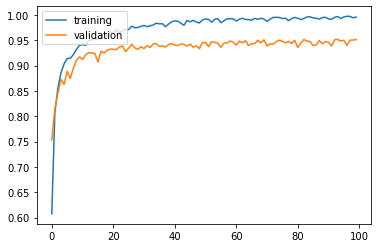

313/313 [==============================] - 0s 837us/step - loss: 0.4861 - accuracy: 0.9482
Test accuracy:  0.948199987411499


In [183]:
model = mlp_model3()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 1)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

# 배치 정규화
- 신경망의 입력값을 평균을 0, 분산을 1로 정규화한 네트워크
- 결론: 학습이 잘 이루어짐 (논문 참조)

In [184]:
from keras.layers import BatchNormalization

In [185]:
#relu 사용
def mlp_model4():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))     # use he_normal initializer
    
    #배치정규화 + 드롭아웃 까지 사용하면 지금까지 나온 논문에서 최강의 성능을 보여준다.
    model.add(BatchNormalization()) #각각의 값이 정규화가 되어버림 (히든레이어에 추가)
    
    model.add(Activation('relu'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    #배치정규화
    model.add(BatchNormalization()) #각각의 값이 정규화가 되어버림 (히든레이어에 추가)
    model.add(Activation('relu'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    #배치정규화
    model.add(BatchNormalization()) #각각의 값이 정규화가 되어버림 (히든레이어에 추가)
    model.add(Activation('relu'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('relu'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model


Epoch 1/100
434/434 [==============================] - 1s 3ms/step - loss: 0.6418 - accuracy: 0.8117 - val_loss: 0.2623 - val_accuracy: 0.9241
Epoch 2/100
434/434 [==============================] - 1s 2ms/step - loss: 0.2668 - accuracy: 0.9185 - val_loss: 0.2001 - val_accuracy: 0.9382
Epoch 3/100
434/434 [==============================] - 1s 2ms/step - loss: 0.2077 - accuracy: 0.9361 - val_loss: 0.2026 - val_accuracy: 0.9386
Epoch 4/100
434/434 [==============================] - 1s 2ms/step - loss: 0.1692 - accuracy: 0.9465 - val_loss: 0.1732 - val_accuracy: 0.9468
Epoch 5/100
434/434 [==============================] - 1s 2ms/step - loss: 0.1434 - accuracy: 0.9556 - val_loss: 0.1660 - val_accuracy: 0.9490
Epoch 6/100
434/434 [==============================] - 1s 2ms/step - loss: 0.1264 - accuracy: 0.9595 - val_loss: 0.1723 - val_accuracy: 0.9468
Epoch 7/100
434/434 [==============================] - 1s 2ms/step - loss: 0.1115 - accuracy: 0.9631 - val_loss: 0.1708 - val_accuracy: 0.9490

Epoch 58/100
434/434 [==============================] - 1s 2ms/step - loss: 0.0253 - accuracy: 0.9924 - val_loss: 0.1784 - val_accuracy: 0.9581
Epoch 59/100
434/434 [==============================] - 1s 2ms/step - loss: 0.0234 - accuracy: 0.9931 - val_loss: 0.1602 - val_accuracy: 0.9633
Epoch 60/100
434/434 [==============================] - 1s 2ms/step - loss: 0.0333 - accuracy: 0.9888 - val_loss: 0.1654 - val_accuracy: 0.9620
Epoch 61/100
434/434 [==============================] - 1s 2ms/step - loss: 0.0279 - accuracy: 0.9908 - val_loss: 0.1654 - val_accuracy: 0.9609
Epoch 62/100
434/434 [==============================] - 1s 2ms/step - loss: 0.0255 - accuracy: 0.9918 - val_loss: 0.1572 - val_accuracy: 0.9645
Epoch 63/100
434/434 [==============================] - 1s 2ms/step - loss: 0.0246 - accuracy: 0.9918 - val_loss: 0.1675 - val_accuracy: 0.9604
Epoch 64/100
434/434 [==============================] - 1s 2ms/step - loss: 0.0230 - accuracy: 0.9918 - val_loss: 0.1628 - val_accuracy:

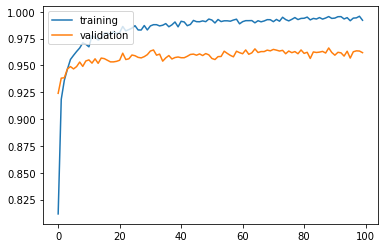

313/313 [==============================] - 0s 799us/step - loss: 0.1946 - accuracy: 0.9620
Test accuracy:  0.9620000123977661


In [186]:
model = mlp_model4()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 1)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

# 드롭아웃 추가
- 배치정규화와 드롭아웃은 최강의 조합
    - 배치정규화는 은닉층 위에 -> activation위
    - 드롭아웃은 activation 아래에 추가

In [192]:
from keras.layers import Dropout

In [193]:
#relu 사용
def mlp_model5():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))     # use he_normal initializer
    
    
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    #배치정규화
    model.add(BatchNormalization()) 
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    #배치정규화
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(BatchNormalization()) 
    model.add(Activation('relu'))  
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model


Epoch 1/100
434/434 [==============================] - 1s 3ms/step - loss: 1.3487 - accuracy: 0.5667 - val_loss: 0.4265 - val_accuracy: 0.8832
Epoch 2/100
434/434 [==============================] - 1s 2ms/step - loss: 0.7045 - accuracy: 0.7896 - val_loss: 0.3000 - val_accuracy: 0.9108
Epoch 3/100
434/434 [==============================] - 1s 2ms/step - loss: 0.5661 - accuracy: 0.8307 - val_loss: 0.2520 - val_accuracy: 0.9247
Epoch 4/100
434/434 [==============================] - 1s 2ms/step - loss: 0.5254 - accuracy: 0.8446 - val_loss: 0.2273 - val_accuracy: 0.9350
Epoch 5/100
434/434 [==============================] - 1s 2ms/step - loss: 0.4656 - accuracy: 0.8644 - val_loss: 0.2103 - val_accuracy: 0.9411
Epoch 6/100
434/434 [==============================] - 1s 2ms/step - loss: 0.4291 - accuracy: 0.8763 - val_loss: 0.2107 - val_accuracy: 0.9379
Epoch 7/100
434/434 [==============================] - 1s 2ms/step - loss: 0.3954 - accuracy: 0.8841 - val_loss: 0.1837 - val_accuracy: 0.9443

Epoch 58/100
434/434 [==============================] - 1s 2ms/step - loss: 0.1586 - accuracy: 0.9546 - val_loss: 0.1299 - val_accuracy: 0.9625
Epoch 59/100
434/434 [==============================] - 1s 2ms/step - loss: 0.1541 - accuracy: 0.9553 - val_loss: 0.1325 - val_accuracy: 0.9633
Epoch 60/100
434/434 [==============================] - 1s 2ms/step - loss: 0.1533 - accuracy: 0.9548 - val_loss: 0.1278 - val_accuracy: 0.9611
Epoch 61/100
434/434 [==============================] - 1s 2ms/step - loss: 0.1497 - accuracy: 0.9561 - val_loss: 0.1359 - val_accuracy: 0.9618
Epoch 62/100
434/434 [==============================] - 1s 2ms/step - loss: 0.1625 - accuracy: 0.9520 - val_loss: 0.1284 - val_accuracy: 0.9630
Epoch 63/100
434/434 [==============================] - 1s 2ms/step - loss: 0.1547 - accuracy: 0.9542 - val_loss: 0.1400 - val_accuracy: 0.9609
Epoch 64/100
434/434 [==============================] - 1s 2ms/step - loss: 0.1570 - accuracy: 0.9531 - val_loss: 0.1296 - val_accuracy:

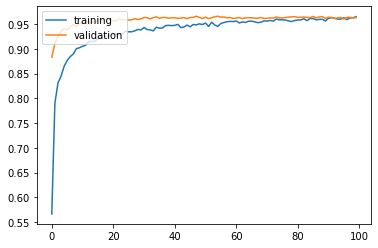

313/313 [==============================] - 0s 837us/step - loss: 0.1399 - accuracy: 0.9651
Test accuracy:  0.9650999903678894


In [194]:
model = mlp_model5()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 1)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

# 앙상블
https://cs231n.github.io/neural-networks-3/#ensemble
- 가중치의 초기값을 다르게 해서, 조금 덜 똑똑한 여러개의 모델로 판단하겠다.
- 이것을 한다고 절대적으로 모델이 좋아지는 것은 아니지만 기대해 볼 수 있다.

In [211]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score

In [207]:
#relu 사용
def mlp_model6():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))     # use he_normal initializer

    
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    #배치정규화
    model.add(BatchNormalization()) 
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    #배치정규화
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(BatchNormalization()) 
    model.add(Activation('relu'))  
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model


In [213]:
model1=KerasClassifier(build_fn=mlp_model6, epochs=100, verbose=1)
model2=KerasClassifier(build_fn=mlp_model6, epochs=100, verbose=1)
model3=KerasClassifier(build_fn=mlp_model6, epochs=100, verbose=1)

In [215]:
#앙상블 분류 모델 생성
ens_clf=VotingClassifier(estimators=[('model1', model1),('model2', model2),('model3', model3)], voting='soft')

In [216]:
#model 3개를 합칮 결과가 나온다
ens_clf.fit(X_train, y_train)

NotImplementedError: Multilabel and multi-output classification is not supported.

이미지 가 가지고 있는 특성 때문에 분류 모델을 만드려면 cnn을 활용할 수 밖에 없다.
- 이미지 모듈 제공되느 함수로 외부이미지를 가져올 수 있다.

In [218]:
from keras.models import Sequential
from keras.layers import *

In [219]:
model = Sequential()
model.add(Conv2D(input_shape = (10, 10, 3), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'valid'))
print(model.output_shape)

(None, 8, 8, 10)


In [220]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical


In [221]:
data = datasets.load_digits()
data

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [222]:
len(data)

7

In [223]:
data.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [224]:
data.images[1]

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [225]:
data.images.shape
#1797개 숫자이미지, 사이즈 8x8

(1797, 8, 8)

In [226]:
data.images[3] #숫자 이미지
data.target[3] #정답

3

In [232]:
X_data=data.images
y_data=data.target

In [233]:
X_data.shape

(1797, 8, 8)

In [234]:
y_data.shape

(1797,)

In [236]:
X_data=X_data.reshape((X_data.shape[0], X_data.shape[1], X_data.shape[2], 1)) #channel 정보 1
#2 차원 데이터를 3차원으로 만들어줌

In [238]:
#one hot encoding
y_data = to_categorical(y_data)

In [239]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 777)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1257, 8, 8, 1)
(540, 8, 8, 1)
(1257, 10, 2)
(540, 10, 2)


In [240]:
from keras.datasets import cifar10

In [241]:
(xtrain,ytrain),_=cifar10.load_data()

170500096/170498071 [==============================] - 14s 0us/step


In [244]:
xtrain.shape

(50000, 32, 32, 3)

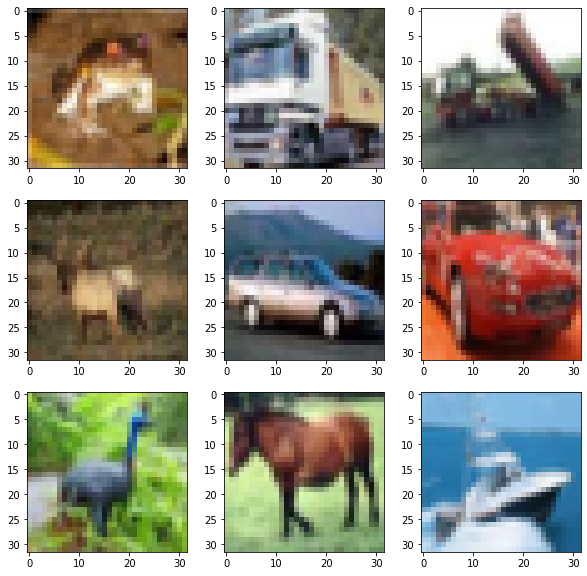

In [246]:
fig = plt.figure(figsize = (10, 10))
for i in range(9):
  fig.add_subplot(3, 3, i+1)
  plt.imshow(xtrain[i])

In [247]:
model = Sequential()
model.add(Conv2D(input_shape = (10, 10, 3), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'valid'))

In [248]:
print(model.output_shape) #출력되어지는 shape

(None, 8, 8, 10)


In [253]:
model = Sequential()
model.add(Conv2D(input_shape = (10, 10, 3), filters = 20, kernel_size = (3,3), strides = (1,1), padding = 'same'))

In [254]:
print(model.output_shape) #출력되어지는 shape

(None, 10, 10, 20)


In [255]:
model.add(MaxPooling2D(pool_size = (2,2), padding = 'valid'))

In [256]:
print(model.output_shape)

(None, 5, 5, 20)


In [257]:
model.add(Flatten()) #마지막 납작한 모양에다가 softmax등으로 확률 추출

In [258]:
print(model.output_shape)

(None, 500)


---

In [259]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical


In [260]:
data = datasets.load_digits()
data

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [261]:
len(data)

7

In [262]:
data.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [263]:
data.images[1]

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [264]:
data.images.shape
#1797개 숫자이미지, 사이즈 8x8

(1797, 8, 8)

In [265]:
data.images[3] #숫자 이미지
data.target[3] #정답

3

In [266]:
X_data=data.images
y_data=data.target

In [267]:
X_data.shape

(1797, 8, 8)

In [268]:
y_data.shape

(1797,)

In [269]:
X_data=X_data.reshape((X_data.shape[0], X_data.shape[1], X_data.shape[2], 1)) #channel 정보 1
#2 차원 데이터를 3차원으로 만들어줌

In [270]:
#one hot encoding
y_data = to_categorical(y_data)

In [271]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 777)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1257, 8, 8, 1)
(540, 8, 8, 1)
(1257, 10)
(540, 10)


In [272]:
model = Sequential()

model.add(Conv2D(input_shape = (X_data.shape[1], X_data.shape[2], X_data.shape[3]), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'valid'))


In [273]:
print(model.output_shape)

(None, 6, 6, 10)


In [274]:
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(50, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))


In [276]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 6, 6, 10)          100       
_________________________________________________________________
activation_59 (Activation)   (None, 6, 6, 10)          0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 10)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 90)                0         
_________________________________________________________________
dense_67 (Dense)             (None, 50)                4550      
_________________________________________________________________
dense_68 (Dense)             (None, 10)                510       
Total params: 5,160
Trainable params: 5,160
Non-trainable params: 0
___________________________________________________

In [277]:
adam = optimizers.Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])


In [278]:
history = model.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 100, verbose = 0)

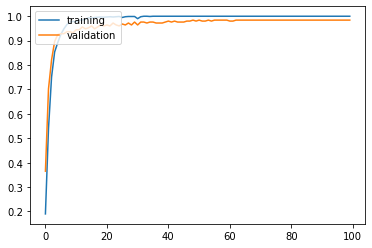

In [279]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()


In [280]:
results = model.evaluate(X_test, y_test)

17/17 [==============================] - 0s 1ms/step - loss: 0.1018 - accuracy: 0.9741


# MNIST
- cnn

In [281]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.utils.np_utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshaping X data: (n, 28, 28) => (n, 28, 28, 1)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(60000, 28, 28, 1) (10000, 28, 28, 1) (60000, 10) (10000, 10)


In [283]:
def basic_cnn():
    model = Sequential()

    model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))

    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    # dense layer with 50 neurons
    model.add(Dense(50, activation = 'relu'))
    # final layer with 10 neurons to classify the instances
    model.add(Dense(10, activation = 'softmax'))

    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

    return model

model = basic_cnn()
model.summary()


Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 50)        500       
_________________________________________________________________
activation_60 (Activation)   (None, 28, 28, 50)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 50)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9800)              0         
_________________________________________________________________
dense_69 (Dense)             (None, 50)                490050    
_________________________________________________________________
dense_70 (Dense)             (None, 10)                510       
Total params: 491,060
Trainable params: 491,060
Non-trainable params: 0
_______________________________________________

In [284]:
history = model.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 100, verbose = 0)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

KeyboardInterrupt: 

In [ ]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])